<a href="https://colab.research.google.com/github/ian-james/AdaptivePacman/blob/master/TQ_ErrorsOverTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Objective

This notebook focuses on student's submissions and errors.

# Setup

This section install and imports any necessary code.

In [0]:
# Installs

In [0]:
#Imports
import io
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

## Helper Functions

In [0]:
# Load a CSV file with a specific separator.
def setupCSV(sep='\t'):    
    uploaded = files.upload()
    f = list(uploaded.keys())
    if( f ):
        filename = f[0]    

    print(filename)
    if( filename ):
      print("\n\nLoaded file:", filename, "\n")
      return  pd.read_csv(filename, sep=sep)    
    return None


# display a grouped as object, can identify specific 
def printGroup( grp, keys = [] ):
    print("Groups: ")
    keyStr = ",".join(keys)
    print("KEYSTR ", keyStr)
    for key, item in grp:
        if( len(keyStr) > 1 ):                
            print("key ", key , "\n",grp.get_group(key)[keyStr], "\n\n")
        else:
            print("key ", key , "\n",grp.get_group(key), "\n\n")

## Graphing Helper Function

In [0]:
def addSubmissionVerticalLines( ax, labels, timePeriod, deadlines):
    if(timePeriod != 'day_of_week'):    
        for index, dd in deadlines.items():        
            x = dd.weekofyear        
            if(timePeriod == 'day_of_year'):
                x = dd.dayofyear
            ax.axvline(x=x, color='r', linestyle='--', label='assignment1')
            labels.append('assignment' + str(index))

# Load Data Frames

Load the submissions data frame.

In [6]:
#full_output_submission.csv
submissionsDF = setupCSV()
#Specify columns as type
submissionsDF['date'] = pd.to_datetime( submissionsDF['date'] )
submissionsDF



Saving full_output_submission.csv to full_output_submission.csv
full_output_submission.csv


Loaded file: full_output_submission.csv 



,id,userId,sessionId,date,feeback_items_count,feeback_items_count_unique_line,feeback_interactions_count,feeback_items_viewed_count,feeback_items_viewed_more_count,feeback_items_viewed_unique_count,submission_time_category,day_of_week,week_of_year,day_of_year
0,40,25,2,2018-02-26 17:14:07,3,2,0,0,0,0,2,2,8,57
1,41,25,2,2018-02-26 17:14:29,4,3,0,0,0,0,2,2,8,57
2,42,25,2,2018-02-26 17:14:44,1,0,0,0,0,0,2,2,8,57
3,43,25,2,2018-02-26 17:14:51,3,2,0,0,0,0,2,2,8,57
4,44,25,2,2018-02-26 17:14:59,4,3,3,3,0,3,2,2,8,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,248,56,13,2018-03-30 22:20:11,0,0,0,0,0,0,2,6,12,89
113,249,56,13,2018-03-30 22:22:07,0,0,0,0,0,0,2,6,12,89
114,250,56,13,2018-03-30 22:23:52,0,0,0,0,0,0,2,6,12,89
115,251,56,13,2018-03-30 22:24:23,0,0,0,0,0,0,2,6,12,89


# Class

Checking which class the assignments and deadlines are associated with.

In [8]:
# full_output_all_class_meta_data or full_output_class
classDF = setupCSV()
classDF 

Saving full_output_all_class_meta_data.csv to full_output_all_class_meta_data.csv
full_output_all_class_meta_data.csv


Loaded file: full_output_all_class_meta_data.csv 



,id,code,disciplineType,classId,student_per_class
0,1,CIS1500,computer science,1,3
1,3,CIS2500,computer science,3,35
2,4,PSYC1500,psychology,4,2


# Assignment Dates


In [9]:
assignmentDF = setupCSV()
assignmentDF['deadline'] = pd.to_datetime( assignmentDF['deadline'] )

Saving full_output_assignment.csv to full_output_assignment.csv
full_output_assignment.csv


Loaded file: full_output_assignment.csv 



In [10]:
print(assignmentDF)

   id  classId   deadline
0   1        3 2018-03-05
1   2        1 2018-03-02
2   3        4 2018-03-12
3   4        3 2018-03-19


## Compiles vs Non-Compiles

In [13]:
# Programs that compiles 
print("Total Submissions = ", submissionsDF.shape[0])

failedSubmissions = submissionsDF[ submissionsDF['feeback_items_count'] > 0 ]
successfulSubmissions =  submissionsDF[ submissionsDF['feeback_items_count'] == 0 ]

# Count the rows from any columbs.
print("Failed Submissions = ", failedSubmissions['id'].count())
print("Successful Submissions = ", successfulSubmissions['id'].count())

Total Submissions =  117
Failed Submissions =  69
Successful Submissions =  48


# Display Compiles vs Non-Compiles over time

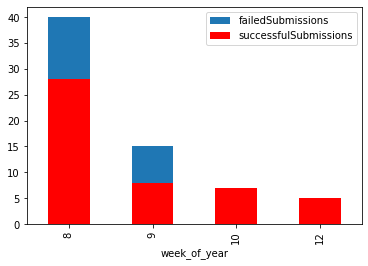

In [15]:
#@title Select time period. { run: "auto" }
time_period_compiles = 'week_of_year' #@param ['day_of_week','day_of_year','week_of_year']

ax = failedSubmissions.groupby(time_period_compiles)['id'].count().plot(kind='bar', stacked=True,label='failedSubmissions' )
successfulSubmissions.groupby(time_period_compiles)['id'].count().plot(ax=ax, kind='bar', stacked=True, color='r', label='successfulSubmissions')
labels=['failedSubmissions','successfulSubmissions']
ax.legend(labels=labels)
plt.show()

# Submissions Over Time

This section checks the number of submissions produced by students over the semester.



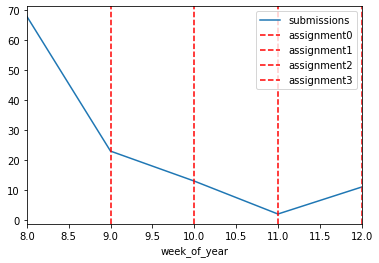

In [16]:
#@title Select time period. { run: "auto" }
time_period_submissions = 'week_of_year' #@param ['day_of_week','day_of_year','week_of_year']

ax = submissionsDF.groupby(time_period_submissions)['userId'].count().plot(kind='line', label='submissions')
h, labels = ax.get_legend_handles_labels()
addSubmissionVerticalLines( ax, labels, time_period_submissions, assignmentDF['deadline'])

ax.legend(labels=labels)
plt.show()

   

# Errors Over Time

This section checks the number of Errors produced by students over the semester.



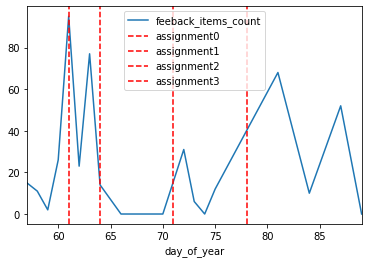

In [26]:
#@title Select time period.
time_period_errors = 'day_of_week' #@param ['day_of_week','day_of_year','week_of_year']
ax = submissionsDF.groupby(time_period_errors)['feeback_items_count'].sum().plot(kind='line')
h, labels = ax.get_legend_handles_labels()
addSubmissionVerticalLines( ax, labels, time_period_errors, assignmentDF['deadline'])
ax.legend(labels=labels)
plt.show()

# Error Rate over Submissions 



## Display User-grouped 



In [0]:
userGrouped = submissionsDF.groupby('userId')

Total Submissions per Student

Submissions per User: 


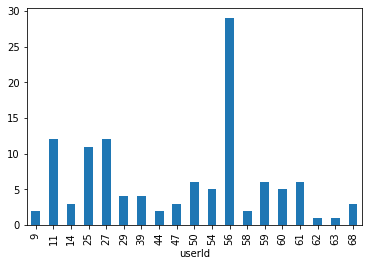

In [18]:
print("Submissions per User: ")
userGrouped['id'].count().plot(kind='bar')

Total Feedback per Student

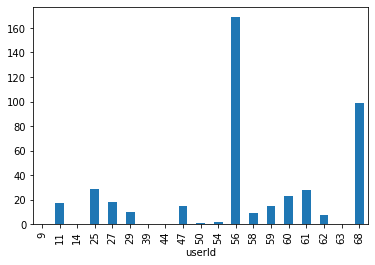

In [19]:
userGrouped['feeback_items_count'].sum().plot(kind='bar')

# Student Feedback per submission.

The mean feedback items per submissions.


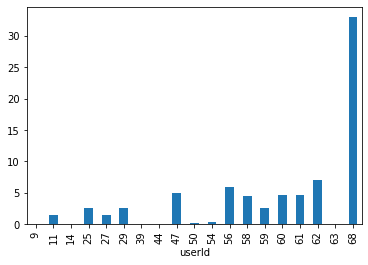

In [20]:
userGrouped['feeback_items_count'].mean().plot(kind='bar')

# Feedback Items per Submissions

Feedback items produced compared to interaction with feedback.

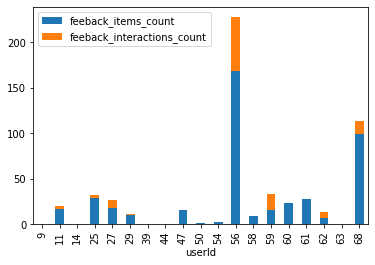

In [21]:
#print(userGrouped['feeback_items_count','feeback_interactions_count'].sum())
userGrouped['feeback_items_count','feeback_interactions_count'].sum().plot( kind='bar', stacked=True)

# Student Submission Rate

The students submission rate per session. 

Eliminate sessions with less than 2 submissions.



In [22]:
# When have students made more than two submissions in a session. 
userSessionGrouped = submissionsDF.sort_values(['userId','sessionId','date']).groupby(['userId','sessionId']).filter( lambda group: group.shape[0] >= 2 )
print(userSessionGrouped)

# Identify the time difference between submissions.
userSessionGrouped['timeDiff'] = userSessionGrouped.groupby(['userId','sessionId'])['date'].diff()
userSessionGrouped['timeDiff'] = userSessionGrouped['timeDiff'].fillna( pd.Timedelta(seconds=0))

#print( userSessionGrouped[['userId','sessionId', 'feeback_items_count', 'timeDiff']] )
print( userSessionGrouped[['userId','sessionId', 'feeback_items_count', 'timeDiff']].describe() )

      id  userId  sessionId  ... day_of_week  week_of_year  day_of_year
81   175       9          2  ...           2             9           64
82   176       9          2  ...           2             9           64
65   137      11          4  ...           7             8           62
66   138      11          4  ...           7             8           62
67   139      11          4  ...           7             8           62
..   ...     ...        ...  ...         ...           ...          ...
71   143      61          1  ...           1             9           63
72   144      61          2  ...           1             9           63
73   145      61          2  ...           1             9           63
104  223      68          2  ...           5            11           81
105  224      68          2  ...           5            11           81

[103 rows x 14 columns]
           userId   sessionId  feeback_items_count                timeDiff
count  103.000000  103.000000       

# Submission rate compared to errors.

The x-axis the time between submissions and feedback errors.

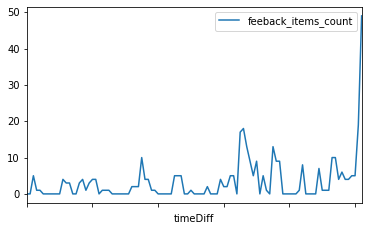

In [23]:
# Plot Errors o
userSessionGrouped[['feeback_items_count', 'timeDiff']].plot(x='timeDiff', y='feeback_items_count', kind='line')

# Individual Student's progress over their sessions

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


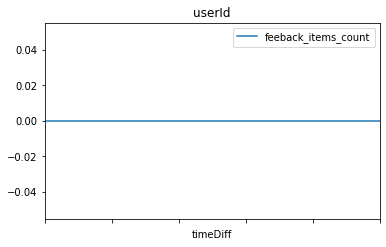

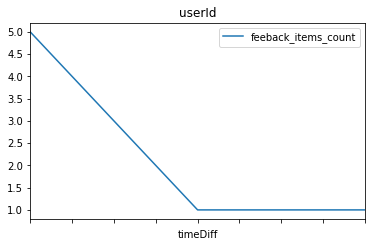

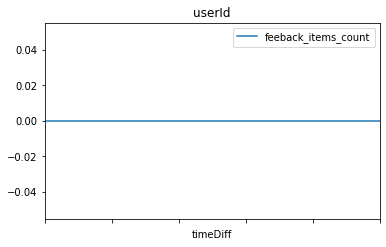

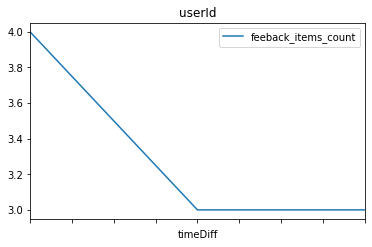

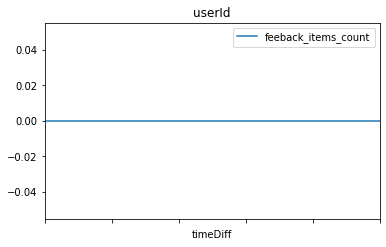

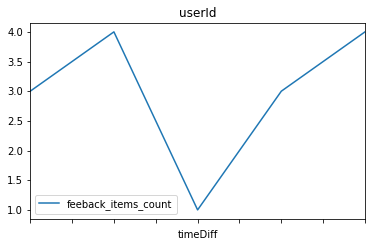

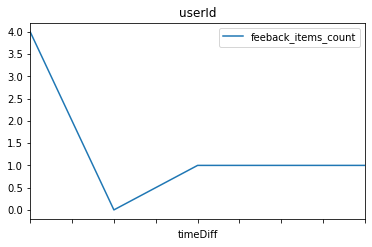

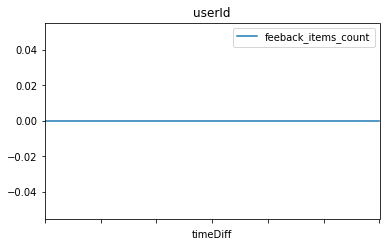

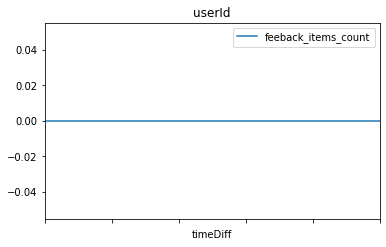

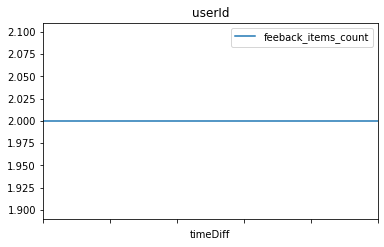

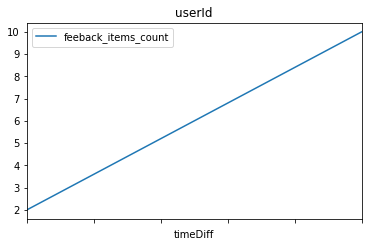

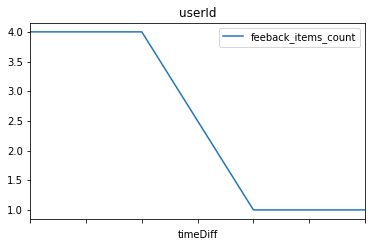

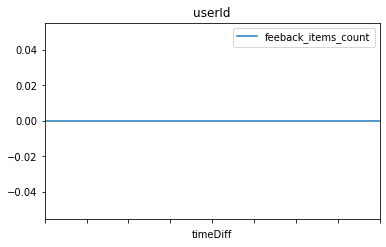

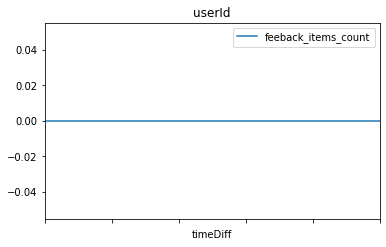

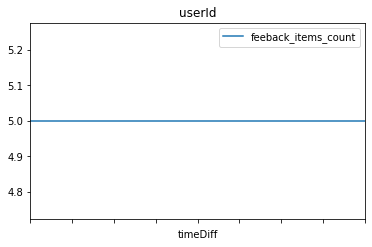

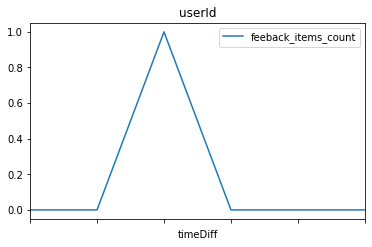

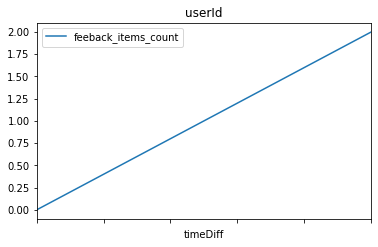

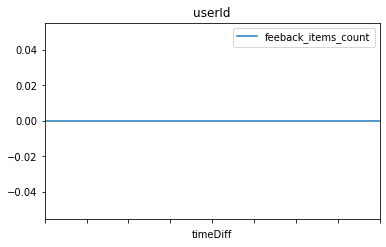

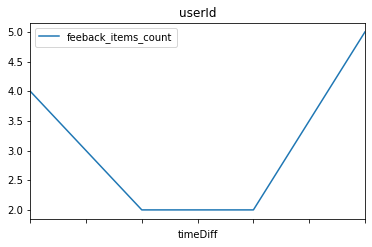

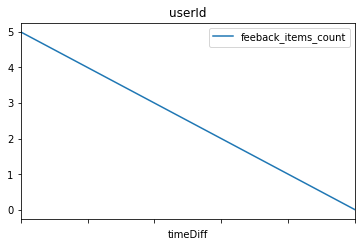

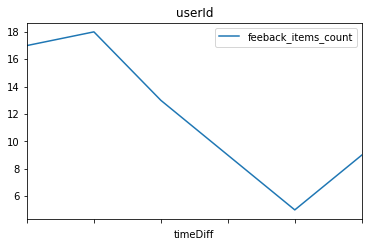

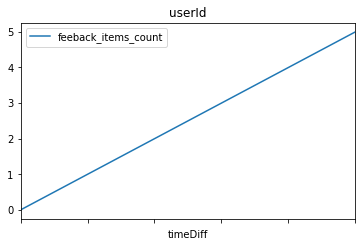

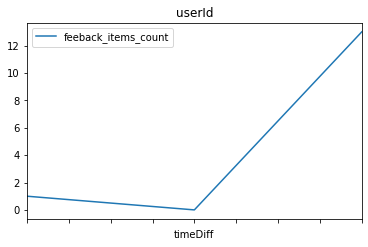

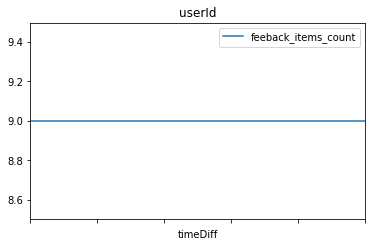

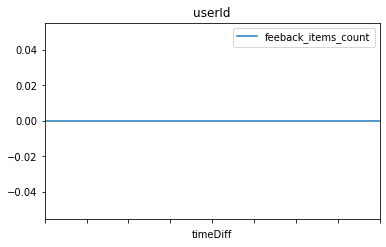

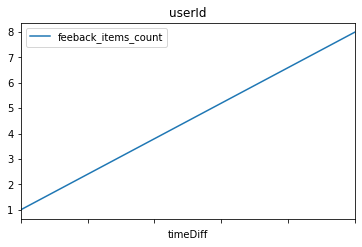

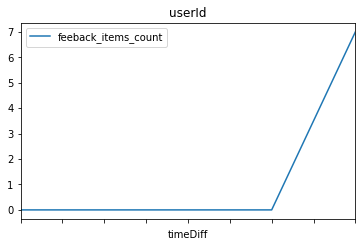

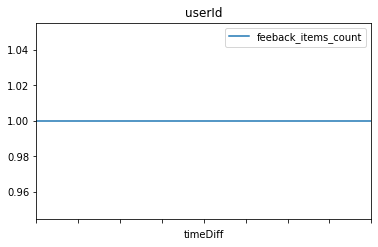

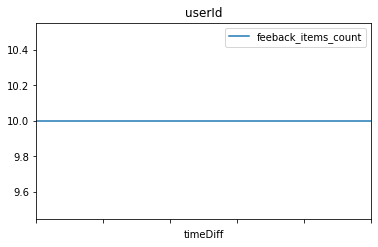

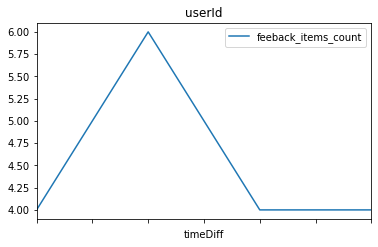

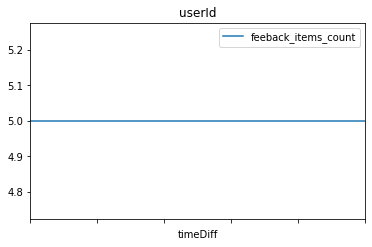

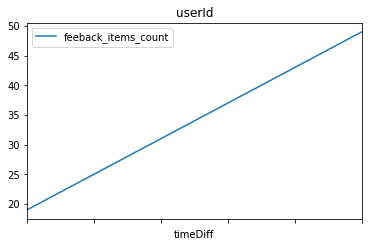

In [24]:
studentPlots = userSessionGrouped.groupby(['userId','sessionId'])['feeback_items_count', 'timeDiff'].plot(x='timeDiff', y='feeback_items_count', kind='line', title='userId')


# Plot Students Session Feedback

---

Per session, student's submisisons are graphed based on the time difference between their submisions times and the number of feedback items.


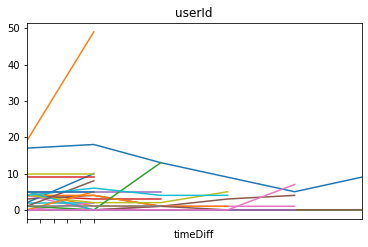

In [25]:
fig, ax = plt.subplots()

studentPlots = userSessionGrouped.groupby(['userId','sessionId'])['feeback_items_count', 'timeDiff'].plot(x='timeDiff', y='feeback_items_count', ax=ax, kind='line', title='userId', legend=False)

In [26]:
userSessionGrp = submissionsDF.groupby(['userId','sessionId'])
printGroup( userSessionGrp['id'])

for key, item in userSessionGrouped:
    print( userSessionGrouped.get_group(key) )
    print("ITEMS ,",item)


#userSessionGrp['newId'] = pd.factorize(  submissionsDF.groupby(['userId','sessionId'])['id'] )

Groups: 
KEYSTR  
key  (9, 2) 
 81    175
82    176
Name: id, dtype: int64 


key  (11, 4) 
 65    137
66    138
67    139
Name: id, dtype: int64 


key  (11, 6) 
 91    210
92    211
93    212
94    213
95    214
96    215
Name: id, dtype: int64 


key  (11, 7) 
 106    242
107    243
108    244
Name: id, dtype: int64 


key  (14, 2) 
 49    119
50    120
Name: id, dtype: int64 


key  (14, 3) 
 83    177
Name: id, dtype: int64 


key  (25, 2) 
 0    40
1    41
2    42
3    43
4    44
Name: id, dtype: int64 


key  (25, 5) 
 55    127
56    128
57    129
58    130
59    131
Name: id, dtype: int64 


key  (25, 6) 
 77    171
Name: id, dtype: int64 


key  (27, 1) 
 51    123
52    124
53    125
54    126
Name: id, dtype: int64 


key  (27, 2) 
 88    194
Name: id, dtype: int64 


key  (27, 3) 
 89    195
90    196
Name: id, dtype: int64 


key  (27, 4) 
 98    217
99    218
Name: id, dtype: int64 


key  (27, 5) 
 100    219
Name: id, dtype: int64 


key  (27, 6) 
 102    221
103    22

AttributeError: ignored

# Testing Function

In [0]:
# Useful for debugging the values.
# Will list the individual groups.
printGroup(userGrouped)